In [34]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
SHAPE_PATH = "dataset/shapefiles/001-alameda.shp"
# SHAPE_PATH = "dataset/shapefiles/003-alpine.shp"

VOTES_PATH = "dataset/final-results/001-alameda.csv"

shapes_gdf = gpd.read_file(SHAPE_PATH)
votes_df = pd.read_csv(VOTES_PATH)

In [36]:
shapes_gdf = shapes_gdf.set_index('pct16').drop('area', axis=1)
shapes_gdf['centroid'] = shapes_gdf.to_crs('epsg:3785').centroid.to_crs(shapes_gdf.crs)

votes_df = votes_df.set_index('pct16')[['pres_clinton', 'pres_trump']]
gdf = shapes_gdf.join(votes_df)
gdf = gdf.rename(columns={'pres_clinton': 'abs_clinton', 'pres_trump': 'abs_trump'})

In [37]:
gdf['per_clinton'] = gdf['abs_clinton'] / (gdf['abs_clinton'] + gdf['abs_trump'])
gdf['per_trump'] = gdf['abs_trump'] / (gdf['abs_clinton'] + gdf['abs_trump'])

In [39]:
gdf.head()

,geometry,centroid,abs_clinton,abs_trump,per_clinton,per_trump
pct16,,,,,,
001-356210,"POLYGON ((-122.20836 37.78115, -122.20798 37.7...",POINT (-122.21145 37.77889),677,49,0.932507,0.067493
001-201700,"POLYGON ((-122.25505 37.87982, -122.25502 37.8...",POINT (-122.25956 37.87715),441,20,0.956616,0.043384
001-415000,"POLYGON ((-122.17769 37.75408, -122.17737 37.7...",POINT (-122.17618 37.74883),548,23,0.959720,0.040280
001-410600,"POLYGON ((-122.15507 37.73908, -122.15527 37.7...",POINT (-122.16094 37.73925),669,25,0.963977,0.036023
001-202310,"POLYGON ((-122.24989 37.87163, -122.24964 37.8...",POINT (-122.24835 37.86954),485,19,0.962302,0.037698


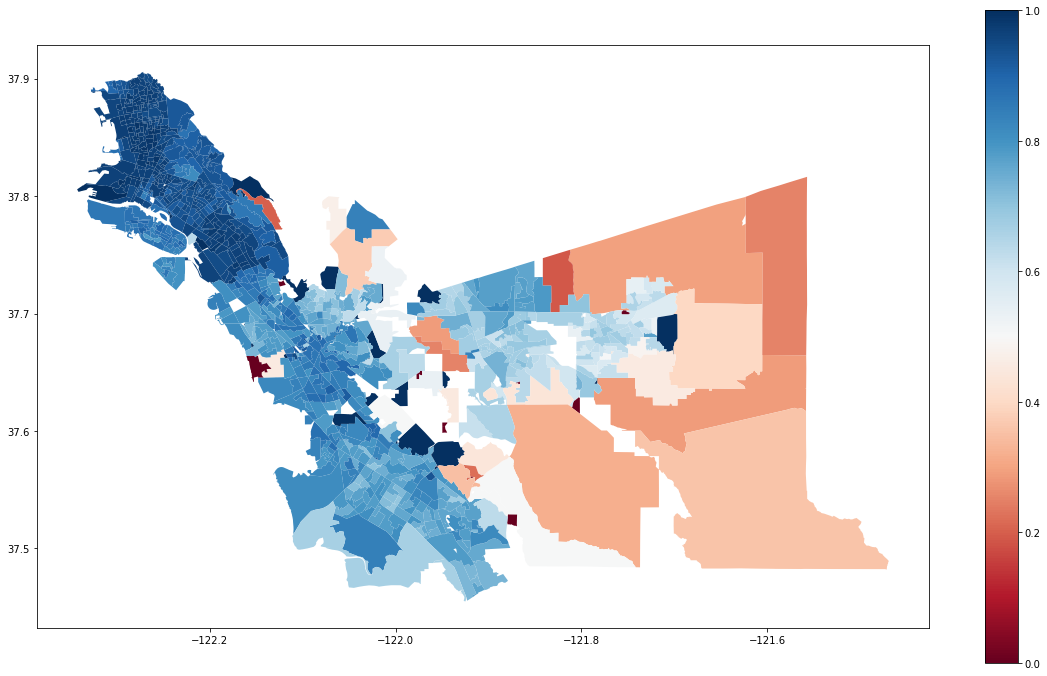

In [40]:
ax = gdf.plot("per_clinton", legend=True, cmap='RdBu', figsize=(20,12))

Check if centroids are valid

<AxesSubplot:>

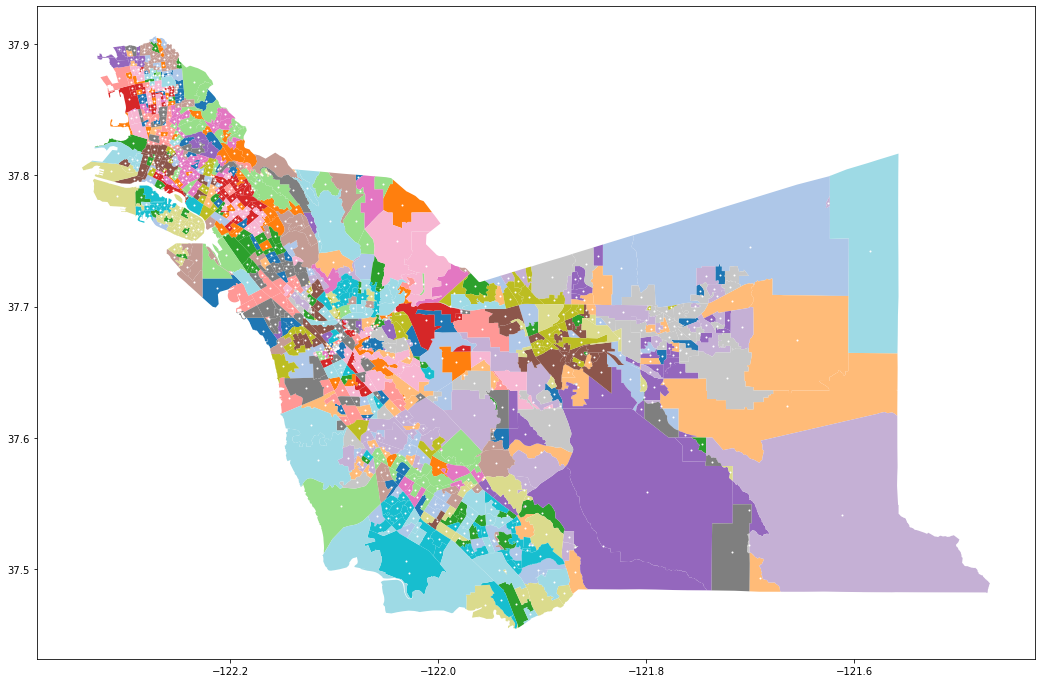

In [29]:
ax = gdf.plot(None, legend=True, cmap="tab20", figsize=(20,12))
gdf["centroid"].plot(ax=ax, color="white", markersize=1)

In [41]:
points = [[x, y] for x, y in zip(gdf['centroid'].values.x, gdf['centroid'].values.y)]